In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%precision %.4f

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<AxesSubplot: >

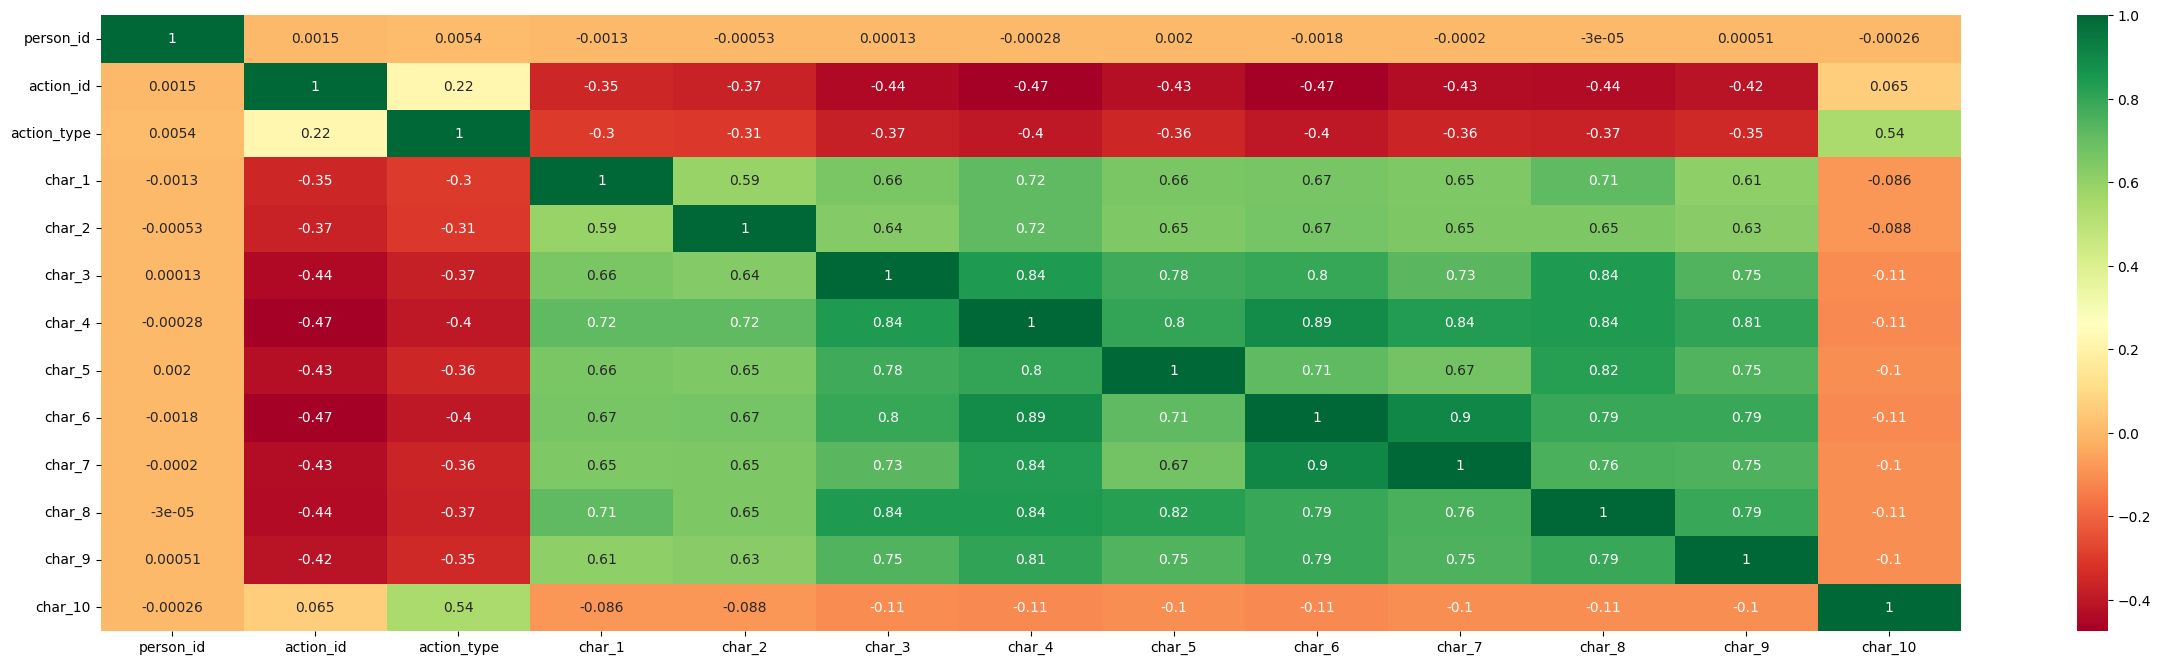

In [2]:
action_test = pd.read_csv('action_test.csv', encoding = "utf-8")
action_test = action_test.drop(columns='Unnamed: 0', axis=1)
action_test = action_test.drop(columns='date', axis=1)
action_test = action_test.fillna(0)

action_test = action_test.replace('[^0-9]+', '', regex=True).astype('int')

action_test.head()
corr = action_test.corr()
plt.figure(figsize=(30,8))
sns.heatmap(corr, cmap="RdYlGn",annot=True)

<AxesSubplot: >

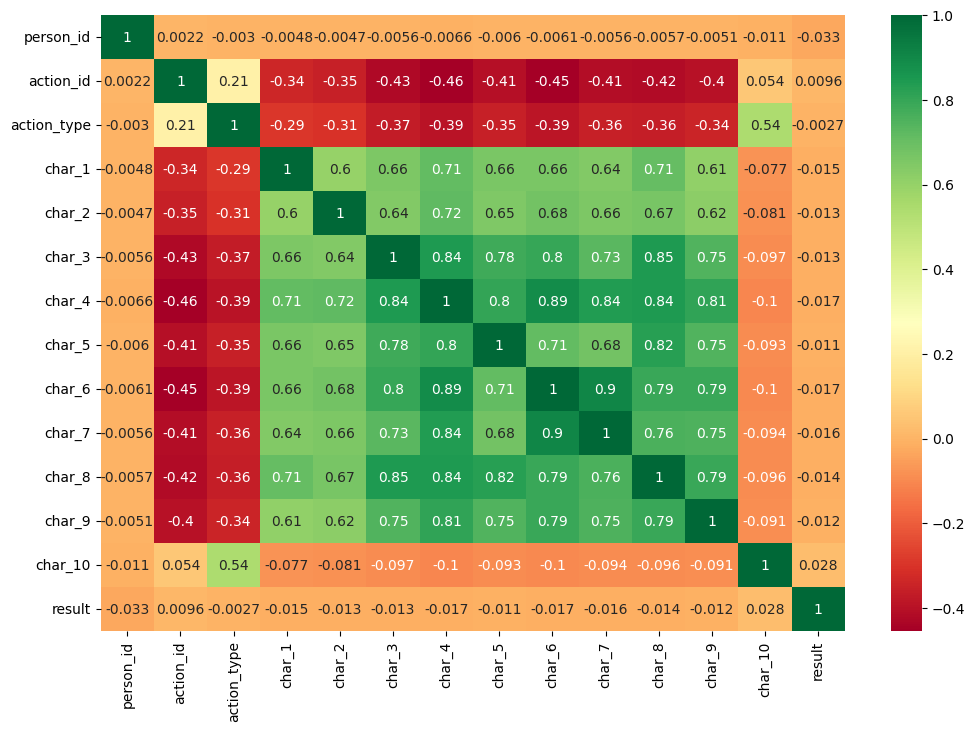

In [3]:
action_train = pd.read_csv('action_train.csv', encoding="utf-8")
action_train = action_train.drop(columns='Unnamed: 0', axis=1)
action_train = action_train.drop(columns='date', axis=1)
action_train = action_train.fillna(0)
action_train = action_train.replace('[^0-9]+', '', regex=True).astype('int')
corr = action_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="RdYlGn",annot=True)

<AxesSubplot: >

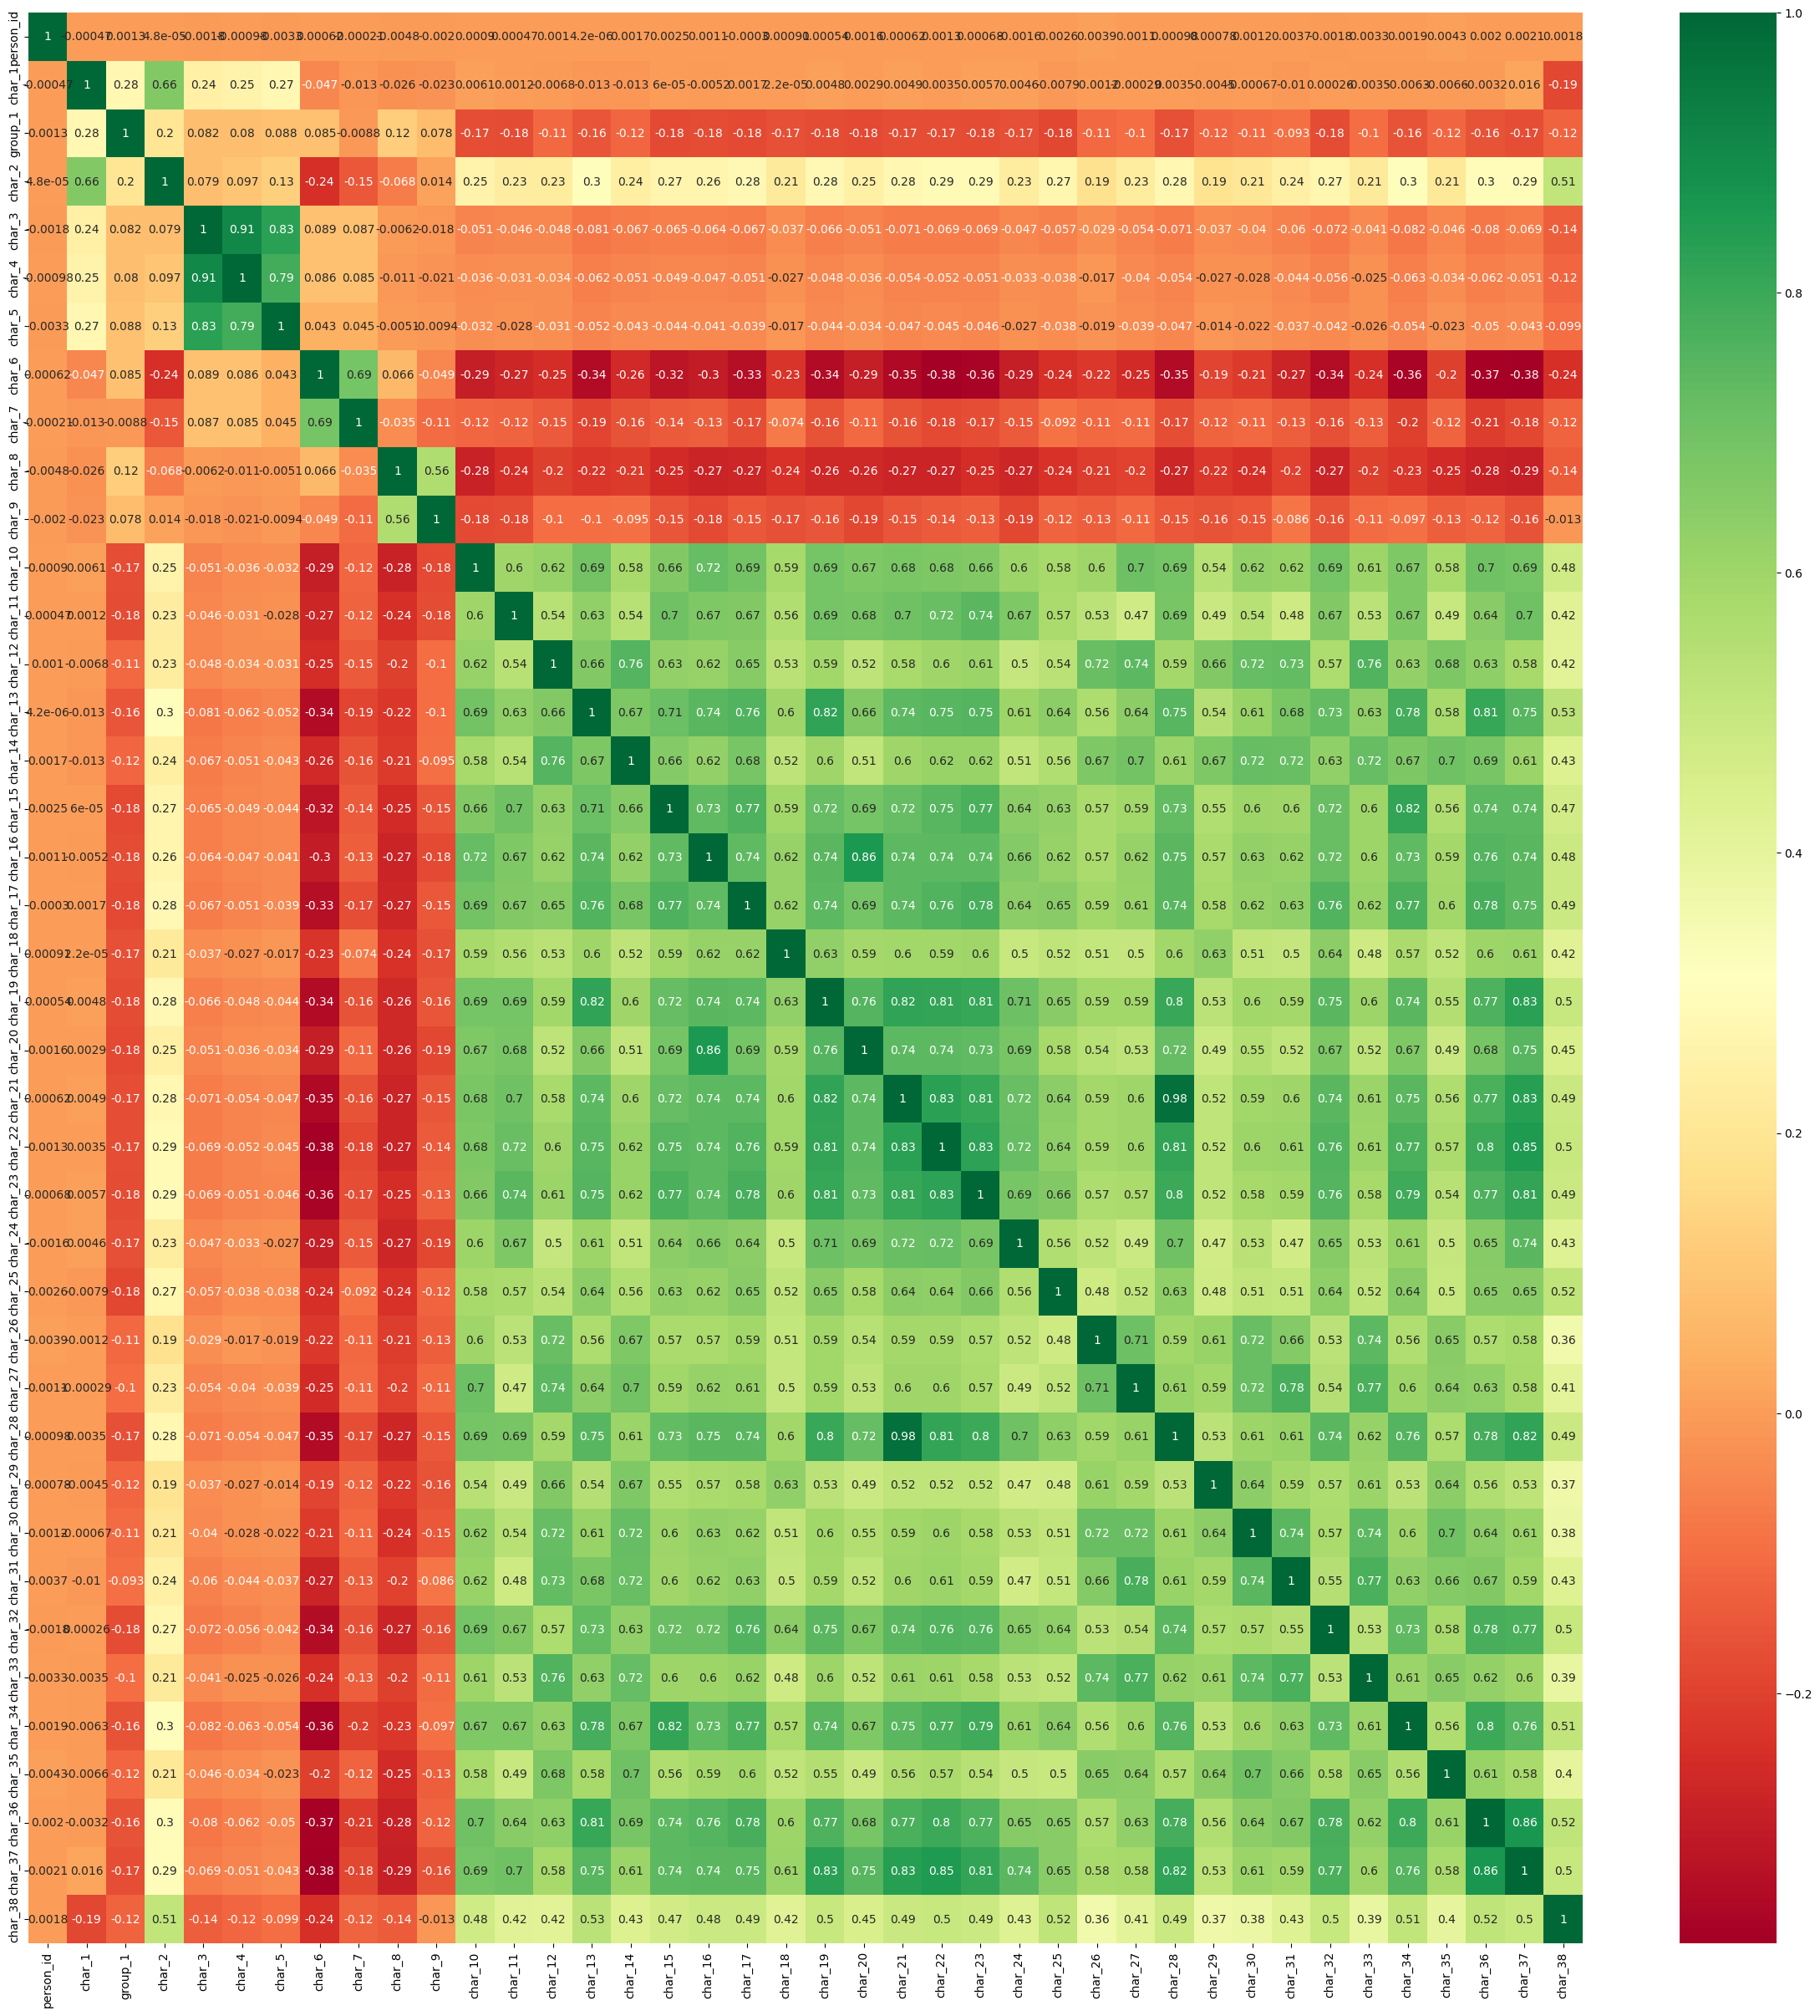

In [4]:
person = pd.read_csv('person.csv', encoding="utf-8")
person = person.drop(columns='Unnamed: 0', axis=1)
person = person.drop(columns='date', axis=1)
person = person.replace({True: 1, False: 0})
person = person.replace('[^0-9]+', '', regex=True).astype('int')
corr = person.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap="RdYlGn",annot=True)

In [5]:
action_test = action_test.merge(person, on=('person_id'))
action_test['result']= ({})
action_test = action_test.fillna(0)
action_test.head()

,person_id,action_id,action_type,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,result
0,100004,1249281,1,5,10,5,1,6,1,1,7,4,0,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.0
1,100004,2230855,5,0,0,0,0,0,0,0,0,0,682,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.0
2,10001,1240724,1,12,1,5,4,6,1,1,13,10,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.0
3,10001,183552,1,20,10,5,4,6,1,1,5,5,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.0
4,10001,21043301,5,0,0,0,0,0,0,0,0,0,3015,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.0


In [6]:
action_train = action_train.merge(person, on=('person_id'))
action_train.head()

,person_id,action_id,action_type,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,result,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100,21734928,4,0,0,0,0,0,0,0,0,0,76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36
1,100,22434093,2,0,0,0,0,0,0,0,0,0,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36
2,100,23404049,2,0,0,0,0,0,0,0,0,0,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36
3,100,23651215,2,0,0,0,0,0,0,0,0,0,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36
4,100,24109017,2,0,0,0,0,0,0,0,0,0,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36


In [7]:
from sklearn.model_selection import train_test_split

y = action_train['result']
x = action_train.drop(columns=['result'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<AxesSubplot: xlabel='result', ylabel='Density'>

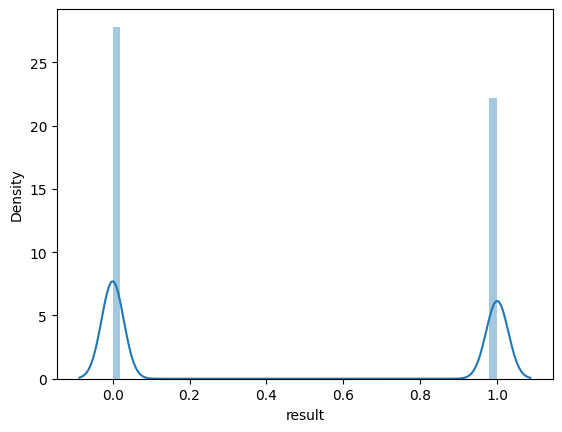

In [8]:
sns.distplot(y_train)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
print(y_train_pred[0])
print(y_train_pred[20000])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

-0.02887802282264601
0.2513451160163377
Test RMSE = 0.3396
Train RMSE = 0.3395


In [12]:
X_action_test  = scaler.transform(action_test.drop('result', axis=1))
action_test['result'] = model.predict(X_action_test)
action_test.head()

,person_id,action_id,action_type,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,result
0,100004,1249281,1,5,10,5,1,6,1,1,7,4,0,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.643294
1,100004,2230855,5,0,0,0,0,0,0,0,0,0,682,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.645854
2,10001,1240724,1,12,1,5,4,6,1,1,13,10,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.715237
3,10001,183552,1,20,10,5,4,6,1,1,5,5,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.724658
4,10001,21043301,5,0,0,0,0,0,0,0,0,0,3015,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.711165


<AxesSubplot: xlabel='result', ylabel='Density'>

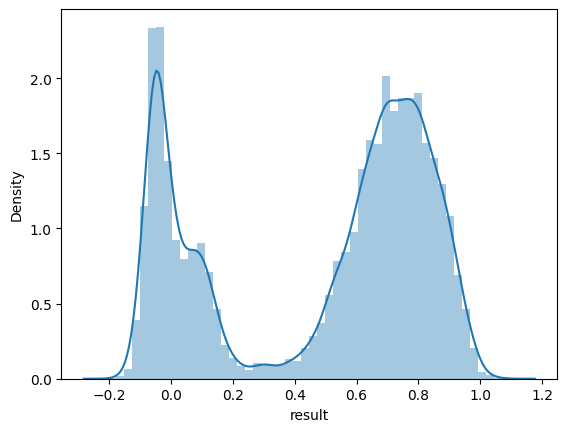

In [13]:
sns.distplot(action_test['result'])

<AxesSubplot: ylabel='Density'>

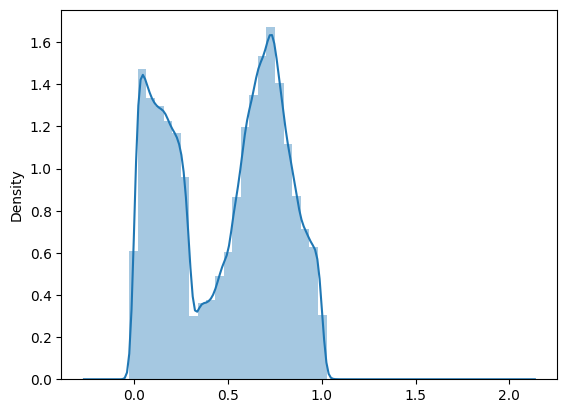

In [14]:
from sklearn.metrics import roc_curve
sns.distplot(roc_curve(y_train, y_train_pred))

<AxesSubplot: ylabel='Density'>

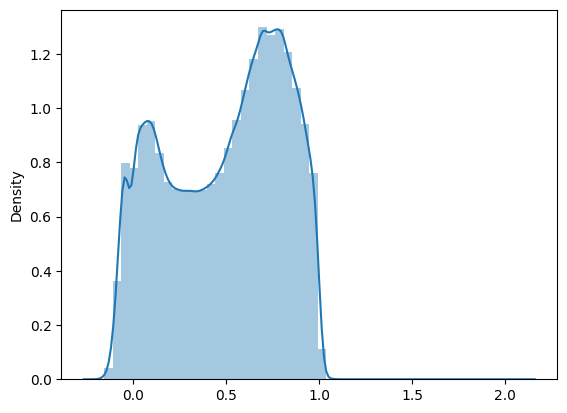

In [15]:
sns.distplot(roc_curve(y_train[:498708:], action_test['result']))

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
# scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
scoring = {'AUC': 'roc_auc'}
C = np.arange(1e-08, 5, 0.1)
n_folds=5
n_repeats=5
lr = LogisticRegression()
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',lr)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit="AUC")

log_clf.fit(X_train_scaled, y_train)
results = log_clf.cv_results_
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print("test score:", log_clf.score(X_test_scaled, y_test))

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.10000001))])
best params: {'clf__C': 0.10000001}
best score: 0.9070542932376787
test score: 0.9071057036835607


In [103]:
model = LogisticRegression(C=0.10000001)
model.fit(X_train_scaled, y_train[:659201])
action_test['result'] = model.predict_proba(X_action_test)

,person_id,action_id,action_type,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,char_1_y,group_1,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,result
0,100004,1249281,1,5,10,5,1,6,1,1,7,4,0,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.355251
1,100004,2230855,5,0,0,0,0,0,0,0,0,0,682,2,22593,3,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,0.342391
2,10001,1240724,1,12,1,5,4,6,1,1,13,10,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.250500
3,10001,183552,1,20,10,5,4,6,1,1,5,5,0,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.218426
4,10001,21043301,5,0,0,0,0,0,0,0,0,0,3015,2,25417,3,6,6,4,1,1,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,90,0.231908


In [108]:
action_test.to_csv('out.csv', columns=['person_id','result'], index=True)